In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline
%config InlineBackend.figure_format='retina'
from datetime import datetime

In [2]:
#Loading train and test data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train_df.shape

(381109, 12)

In [7]:
print(train_df.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [8]:
# Checking for missing values
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
#Summary Statistic
train_df. describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:xlabel='Vehicle_Age'>

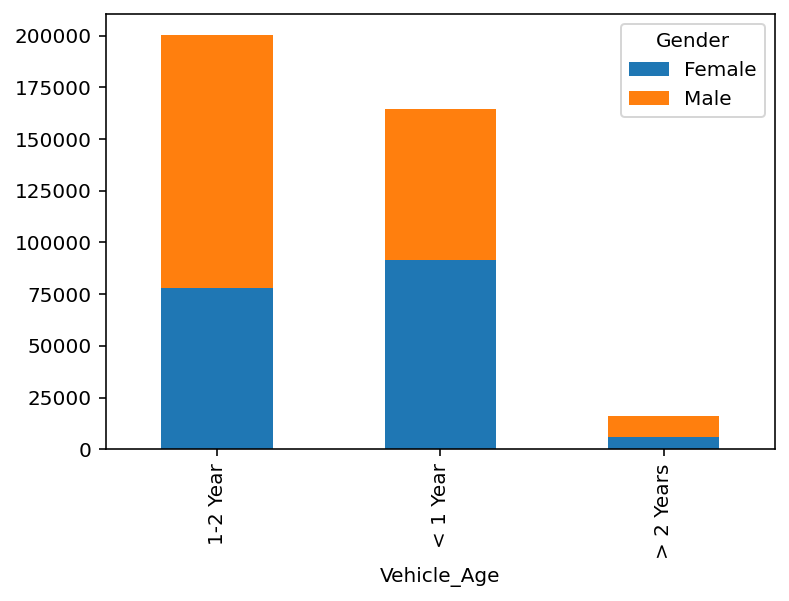

In [10]:
train_df.groupby(['Vehicle_Age', 'Gender'])['Gender'].count().unstack().plot(kind="bar", stacked=True)

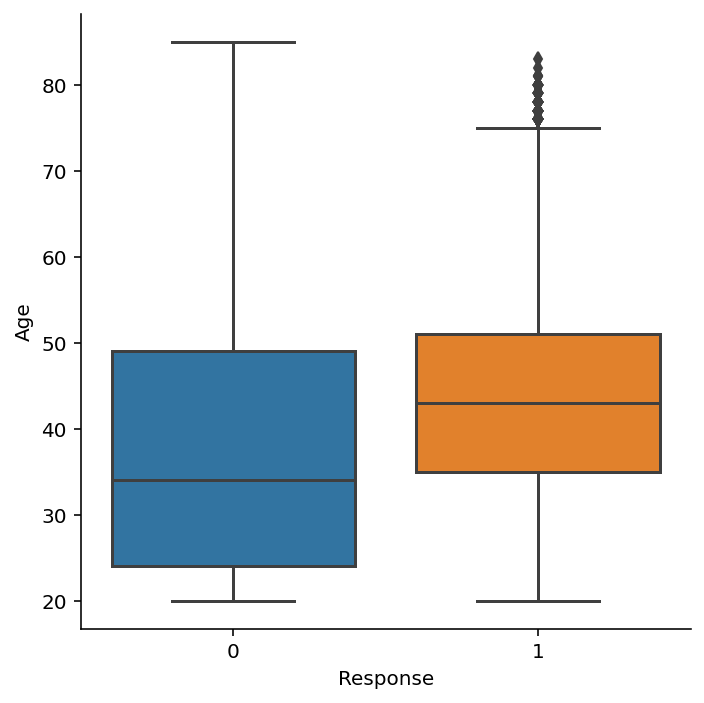

In [11]:
sns.catplot(x="Response", y="Age", data=train_df, kind="box");

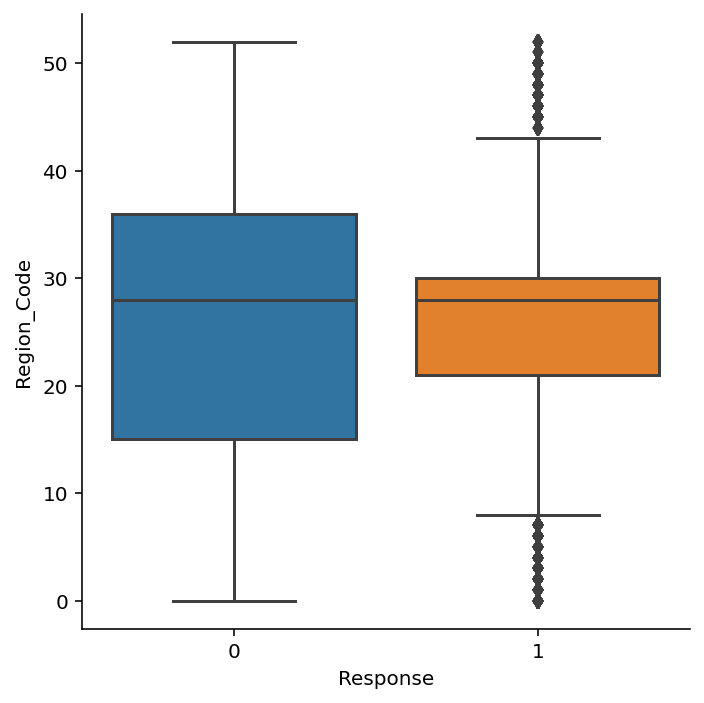

In [12]:
sns.catplot(x="Response", y="Region_Code", data=train_df, kind="box");

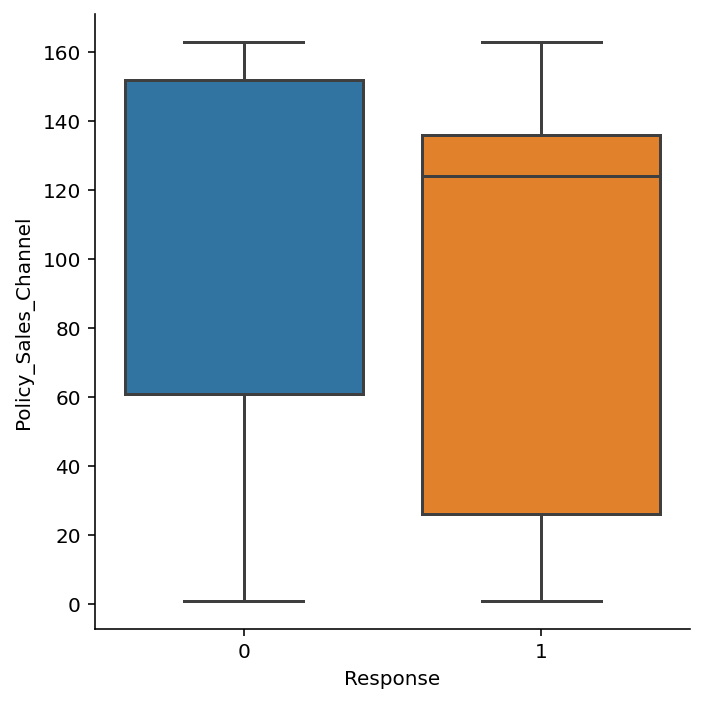

In [13]:
sns.catplot(x="Response", y="Policy_Sales_Channel", data=train_df, kind="box");

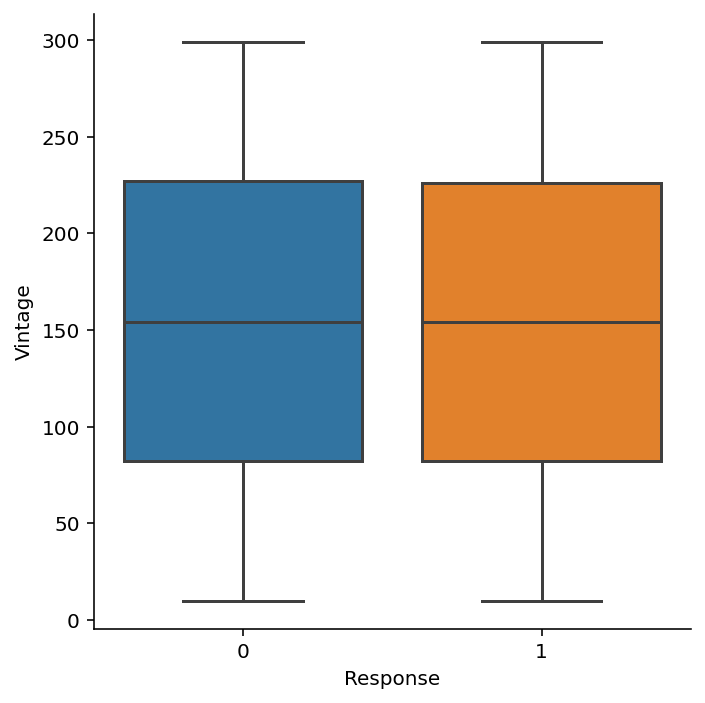

In [14]:
sns.catplot(x="Response", y="Vintage", data=train_df, kind="box");

<AxesSubplot:xlabel='Response'>

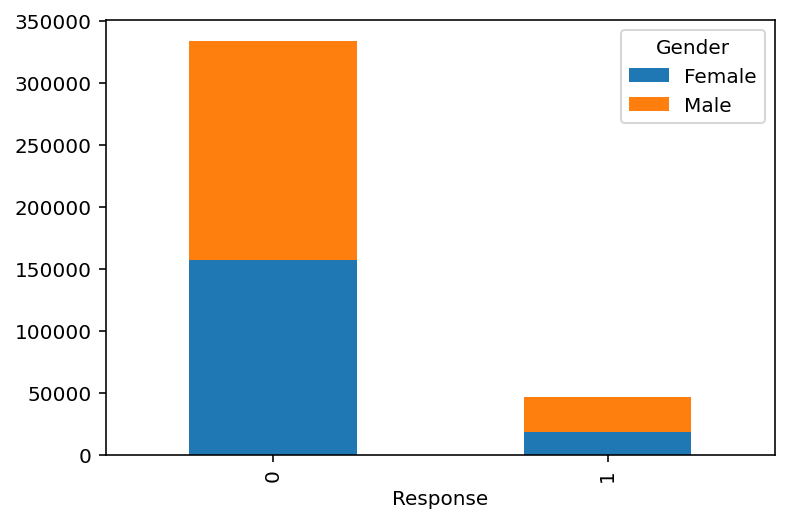

In [15]:
train_df.groupby(['Response', 'Gender'])['Gender'].count().unstack().plot(kind="bar", stacked=True)

In [16]:
### We need to create some pair plot to see the relation between the features.
pairplot = train_df.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

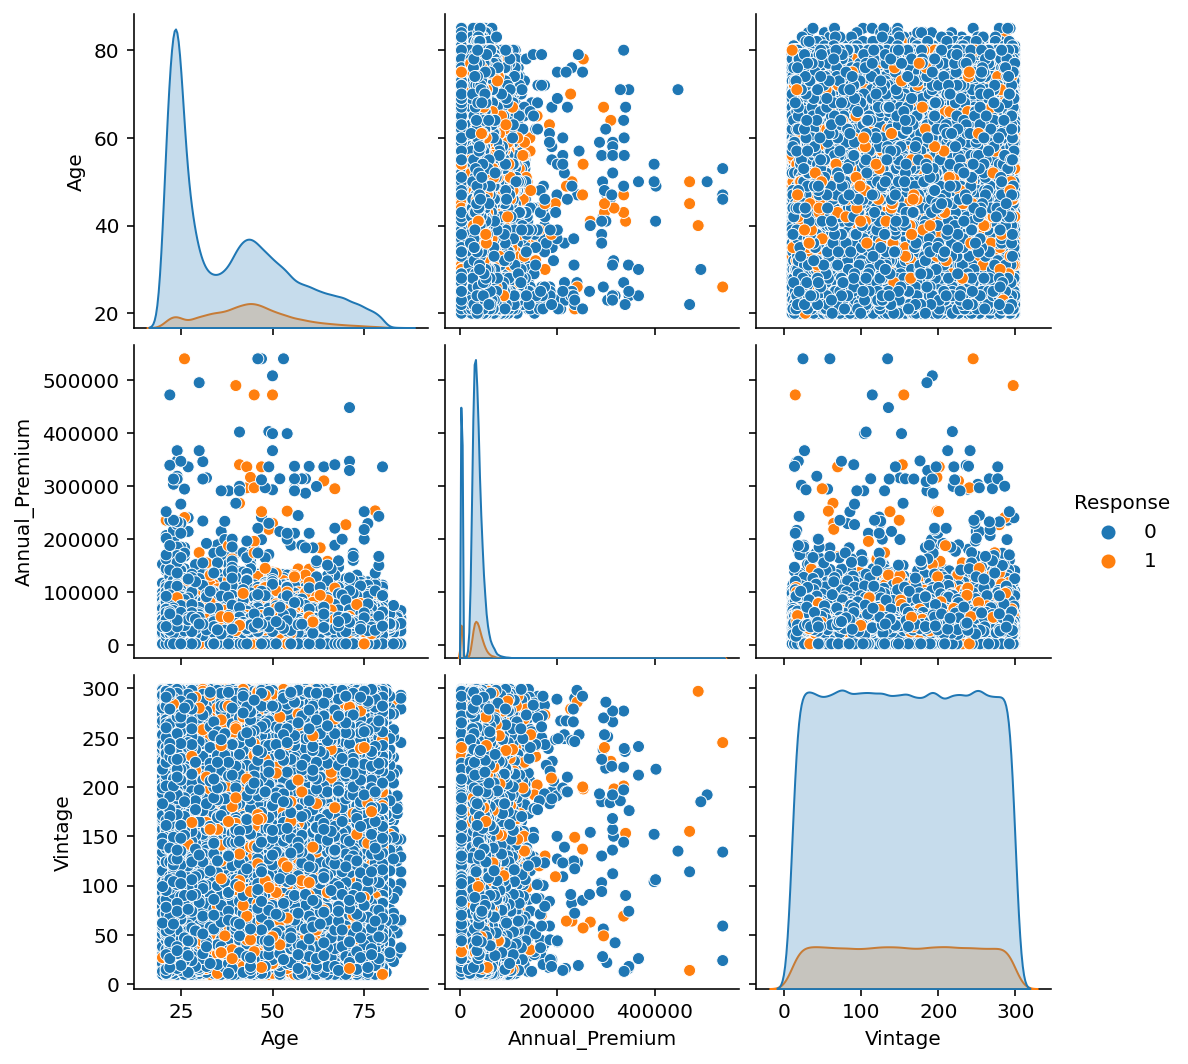

In [17]:
sns.pairplot(pairplot, hue ='Response')

In [18]:

#From the above graphs we can see that data is skewed, Before training the model we will correct the skewness using Preprocess

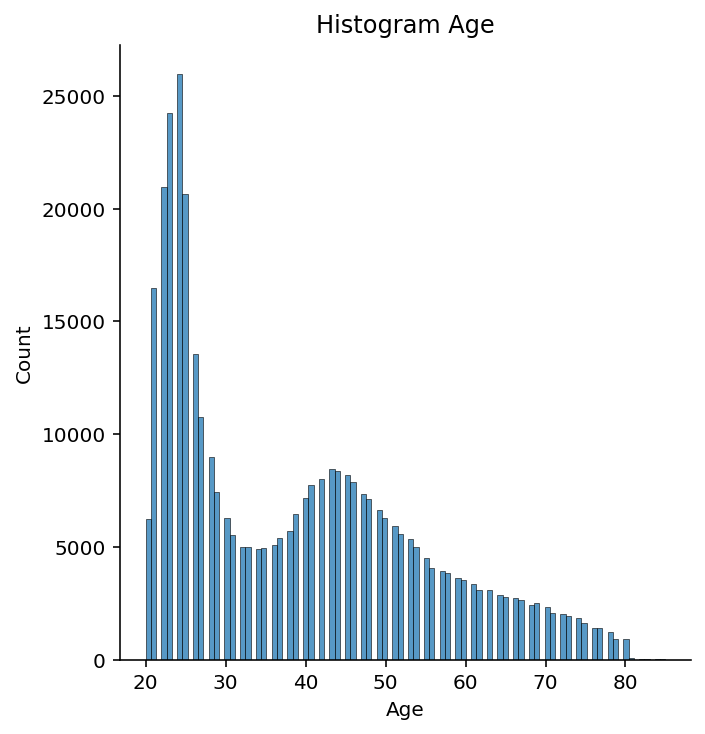

In [19]:
sns.displot(train_df, x="Age")
plt.title("Histogram Age")#title of graph
plt.show()#show graph

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


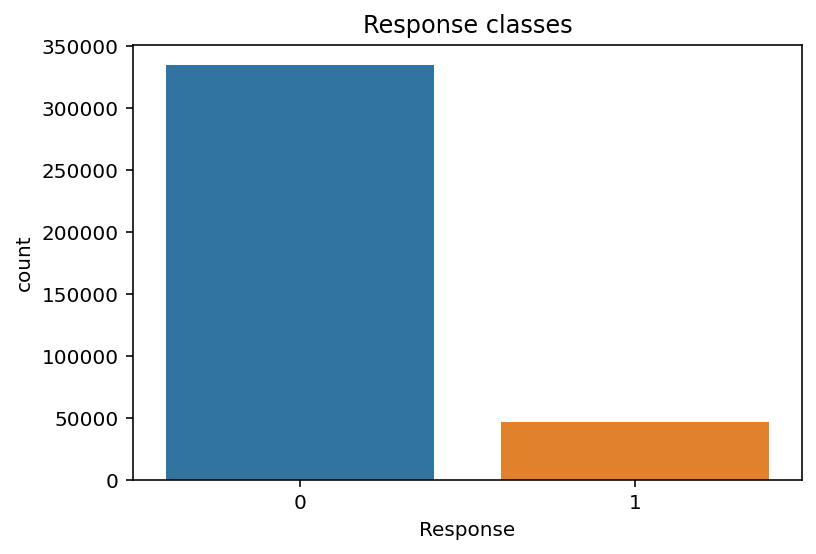

In [20]:
#Checking Target varaible 
sns.countplot(train_df.Response)
plt.title("Response classes")#title of graph
plt.show()#show graph

In [21]:
#Checking the count of  values in response
train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

There are higher people who whould be not be intrested compared to people that would. 

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


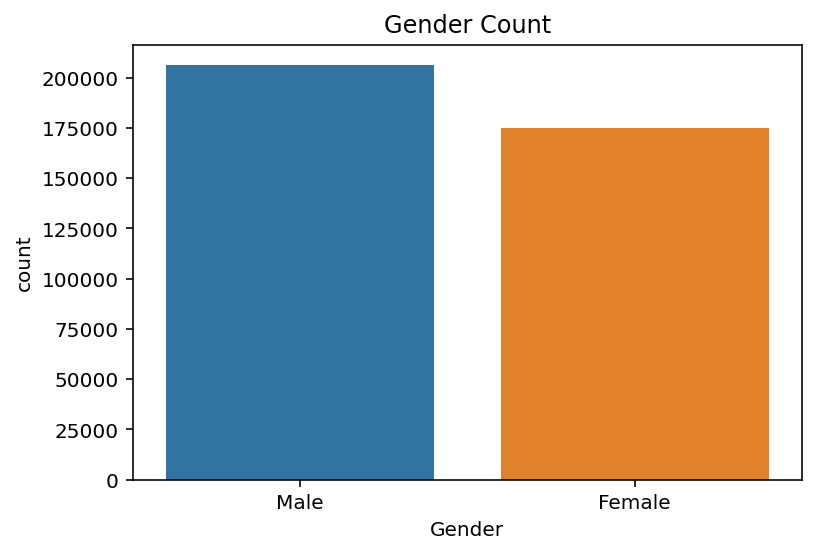

In [22]:
#Checking gender count
sns.countplot(train_df.Gender)
train_df.Gender.value_counts()
plt.title("Gender Count")#title of graph
plt.show()#show graph

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


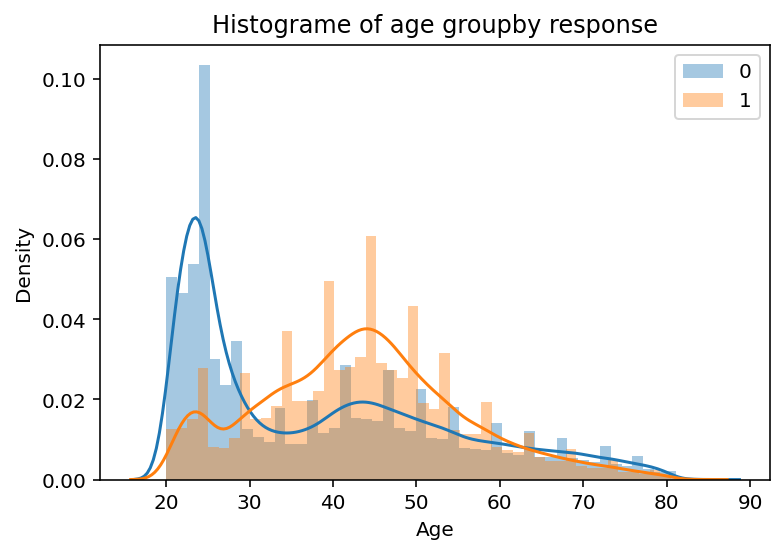

In [23]:
sns.distplot(train_df[train_df.Response==0]['Age'], label='0')
sns.distplot(train_df[train_df.Response==1]['Age'], label='1')
plt.legend()
plt.title("Histograme of age groupby response")#title of graph
plt.show()#show graph

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


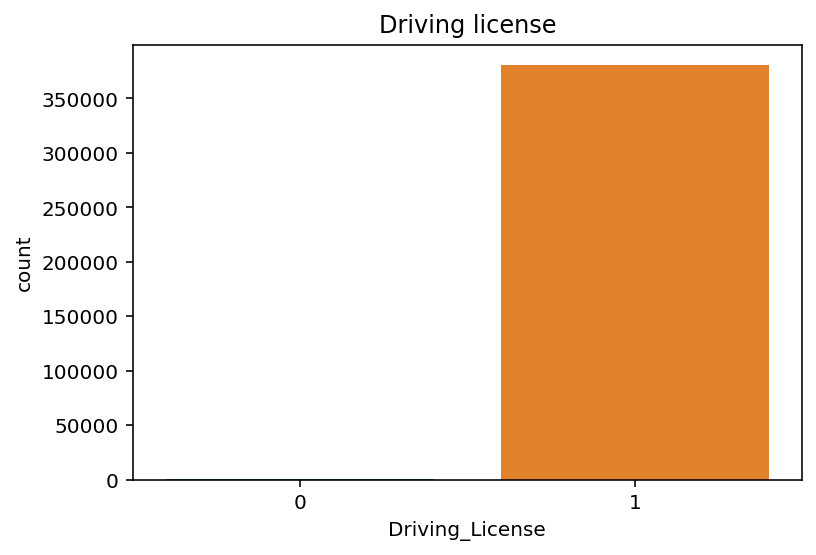

In [24]:
#Checking  Driving_License count
sns.countplot(train_df.Driving_License)
train_df.Driving_License.value_counts()
plt.title("Driving license")#title of graph
plt.show()#show graph

So when I ran this looks like everyone has a driver license BUT take a look at the count of numbers that do not have license 
its 812. I wonder if people will say yes or no based on having a license.

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


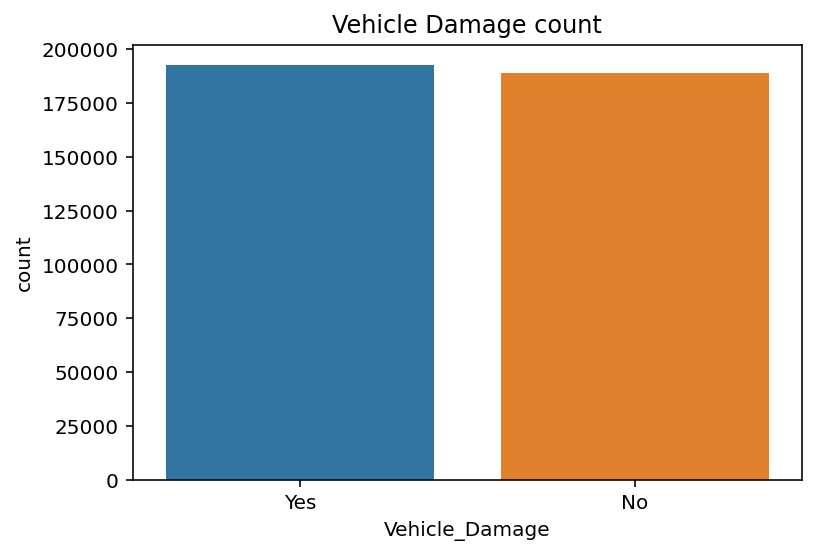

In [25]:
#Checking  Vehicle_Damage count
sns.countplot(train_df.Vehicle_Damage)
train_df.Vehicle_Damage.value_counts()
plt.title("Vehicle Damage count")#title of graph
plt.show()#show graph

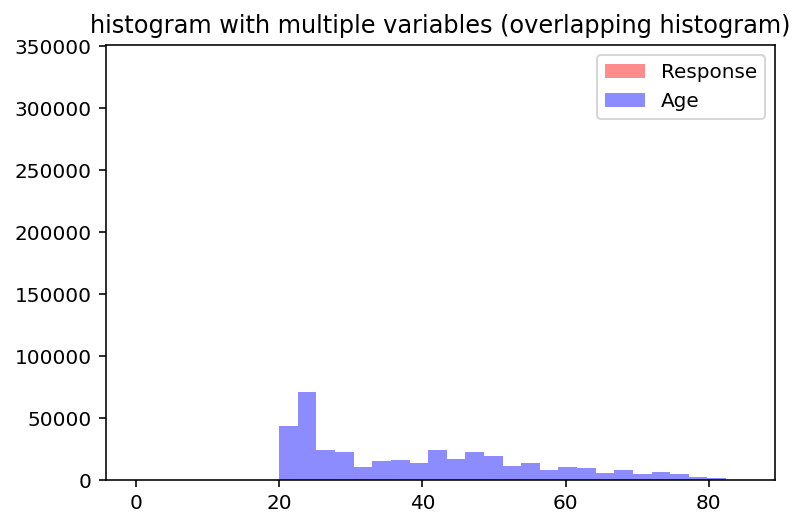

In [26]:
# plotting two histograms on the same axis
plt.hist(train_df['Response'], bins=25, alpha=0.45, color='red')
plt.hist(train_df['Age'], bins=25, alpha=0.45, color='blue')
  
plt.title("histogram with multiple \
variables (overlapping histogram)")
  
plt.legend(['Response', 
            'Age'])
  
plt.show()

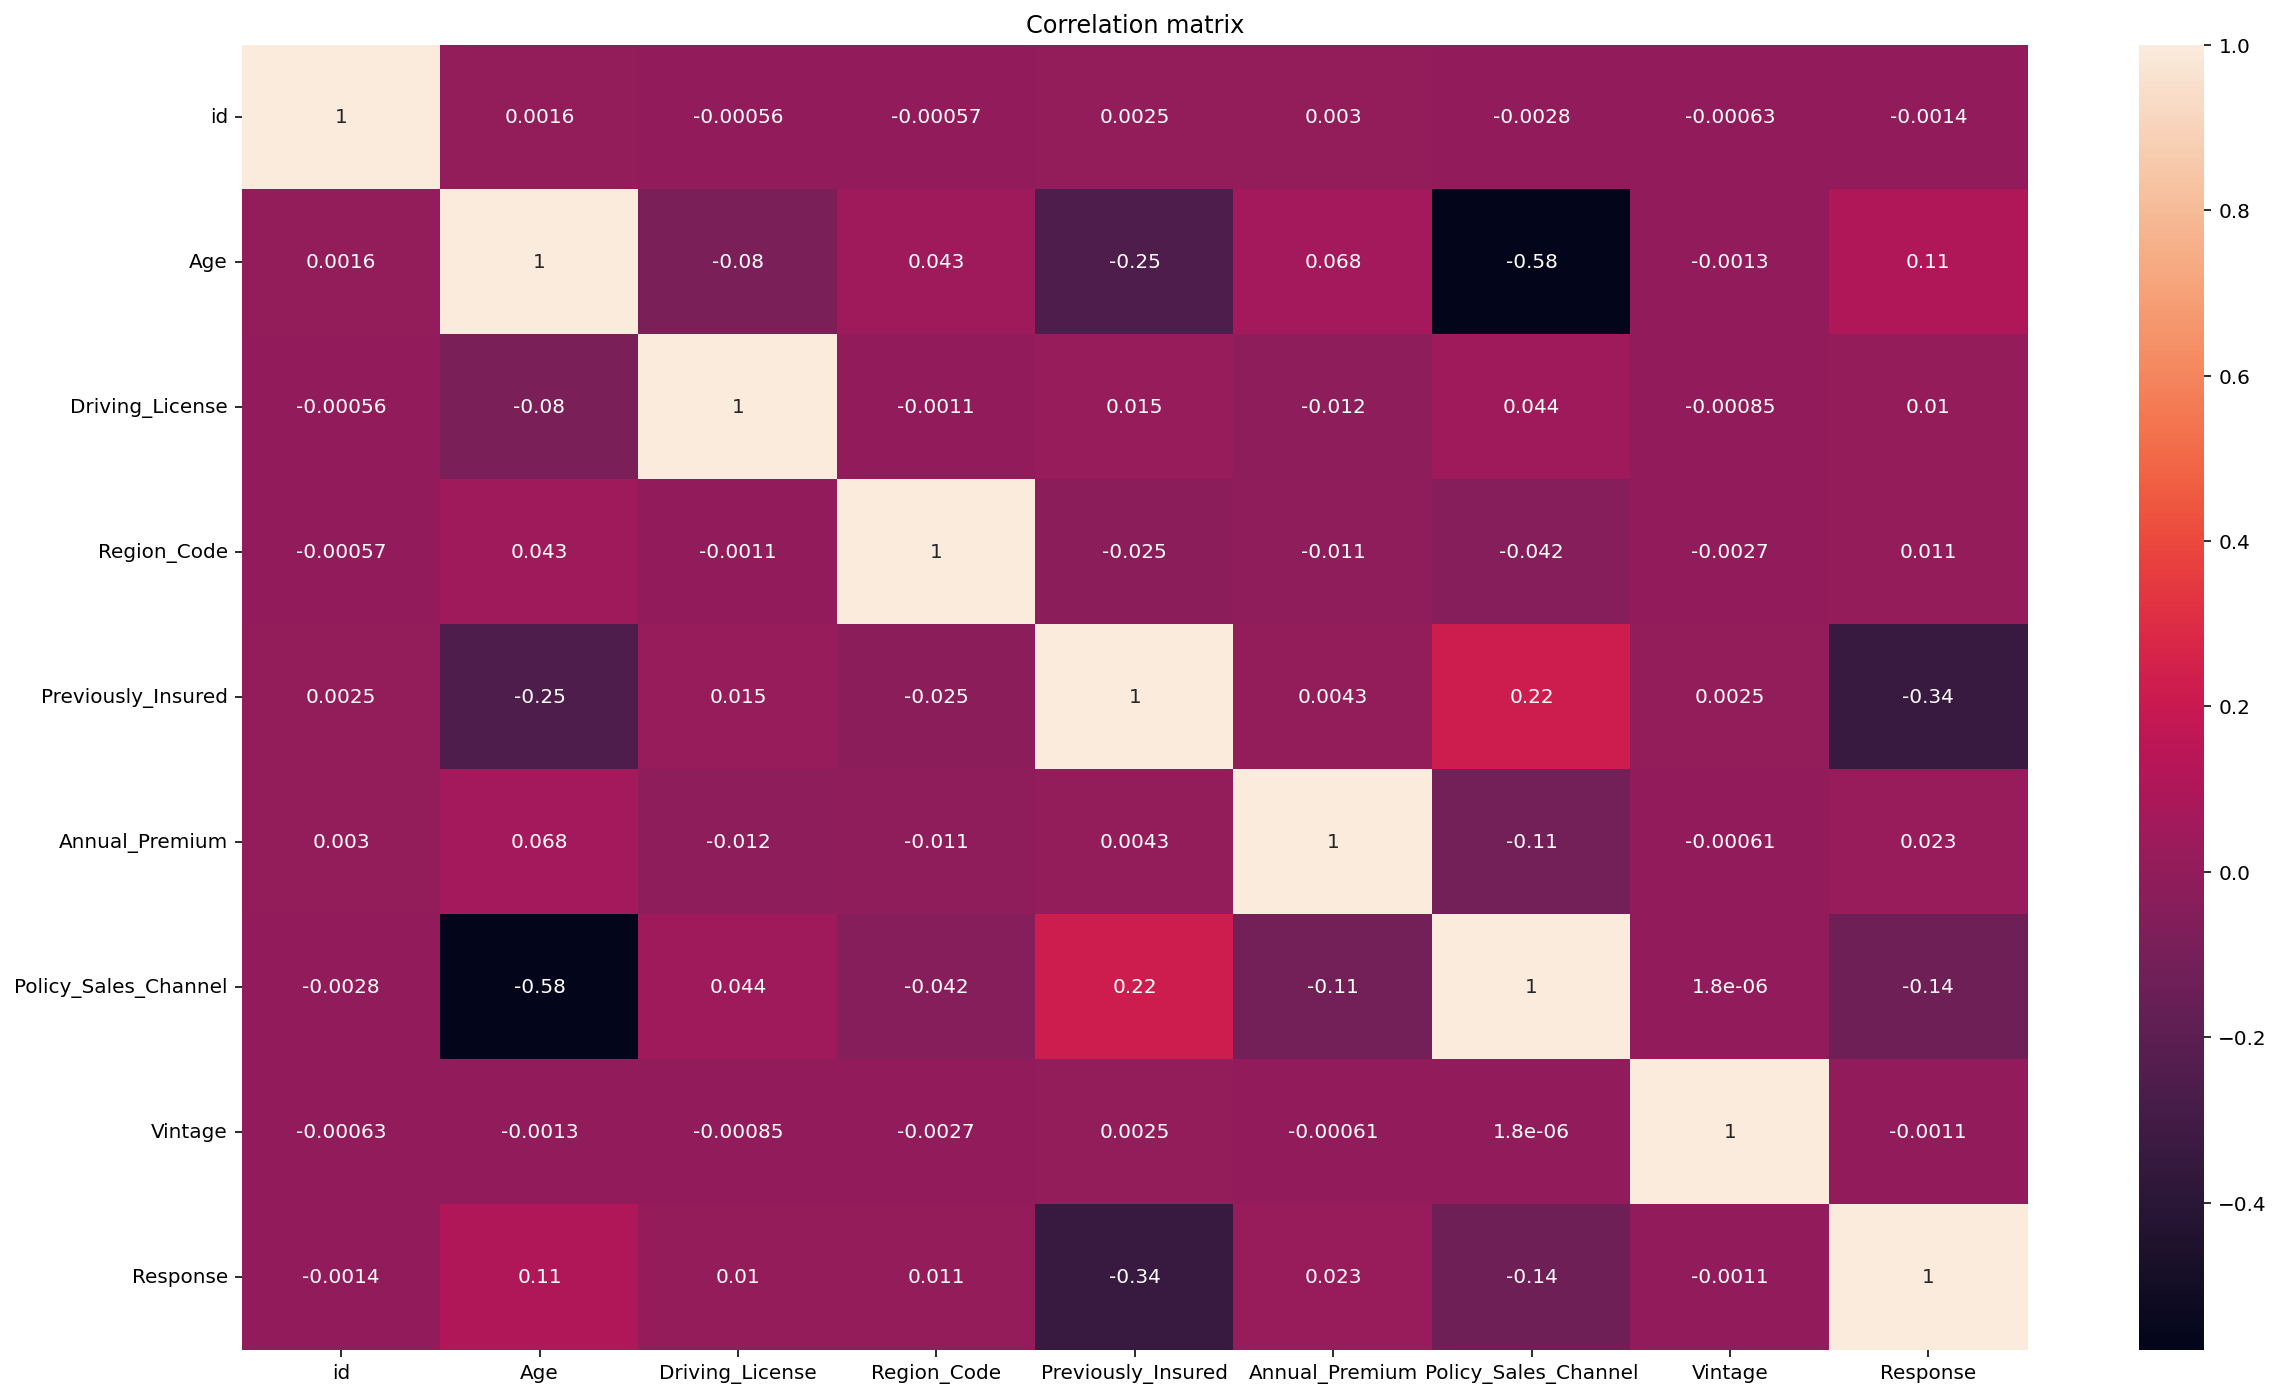

In [27]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True)
plt.title("Correlation matrix")#title of graph
plt.show()#show graph

# Feature engineering

In [28]:
train_df.dropna(inplace=True)

In [29]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [30]:
train_df['Vehicle_Damage'] = np.where(train_df['Vehicle_Damage']=='Yes', 1, 0)

In [31]:
col         = 'Vehicle_Age'
conditions  = [train_df[col] == '< 1 Year', train_df[col] == '1-2 Year', train_df[col] == '> 2 Years']
choices     = [1, 2, 3]
    
train_df['Vehicle_Age'] = np.select(conditions, choices, default=0)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']:
    train_df[col] =  scaler.fit_transform(np.array(train_df[col]).reshape(-1, 1))

In [33]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,0.333777,1,0.121784,0,3,1,0.574539,-1.587234,0.748795,1
1,2,Male,2.396751,1,-1.767879,0,2,0,0.172636,-1.587234,0.342443,0
2,3,Male,0.527181,1,0.121784,0,3,1,0.449053,-1.587234,-1.521998,1
3,4,Male,-1.148985,1,-1.163187,1,1,0,-0.113018,0.737321,0.581474,0
4,5,Female,-0.633242,1,1.104409,1,1,0,-0.178259,0.737321,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,2.267815,1,-0.029389,1,2,0,-0.022912,-1.587234,-0.792954,0
381105,381106,Male,-0.568774,1,0.802063,1,1,0,0.549093,0.737321,-0.279037,0
381106,381107,Male,-1.148985,1,0.272958,1,1,0,0.264543,0.884912,0.079509,0
381107,381108,Female,1.881007,1,-0.936427,0,3,1,0.816389,0.220753,-0.960275,0
